# Setup

In [1]:
import scanpy as sc
import scvi
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd

Global seed set to 0


In [2]:
sc.set_figure_params(figsize=(4,4),  dpi=150, dpi_save=300, facecolor="white", frameon=False)
sns.set_context("paper")
plt.rcParams["axes.grid"] = False
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
os.getcwd()

'/notebook/Joe/M-cells/code'

# import data

In [4]:
adata = sc.read("/notebook/External/Archive/Joe/processed_data/M_cell/h5ad_files/post_Aire_WT_1511_genes.h5ad")
model = scvi.model.SCVI.load("/notebook/External/Archive/Joe/processed_data/M_cell/scVI_models/combined_WT_1511_genes", adata=adata, use_gpu=True)

INFO     File /notebook/External/Archive/Joe/processed_data/M_cell/scVI_models/combined_WT_15
         11_genes/model.pt already downloaded                                                


In [5]:
adata.obs

,batch,scrublet_score,scrublet_called_doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,_scvi_batch,_scvi_labels,leiden_scVI,cell_type,post_Aire_leiden_scVI
AAACCCAAGCCACCGT-1,Corey,0.061150,False,4330,22888.0,411.0,1.795701,4330,0,0,1,Late Aire 1,1
AAACCCACACGTAGAG-1,Corey,0.088096,False,4818,20949.0,1606.0,7.666237,4818,0,0,2,Post Aire 1 (Tspan8),3
AAACCCACACTCCCTA-1,Corey,0.116656,False,2066,6615.0,80.0,1.209373,2066,0,0,2,Post Aire 1 (Tspan8),3
AAACCCACATTGACTG-1,Corey,0.077549,False,3973,12769.0,573.0,4.487431,3973,0,0,2,Post Aire 1 (Tspan8),6
AAACCCATCACCTTAT-1,Corey,0.066695,False,808,1775.0,171.0,9.633802,808,0,0,3,Late Aire 2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAAGAGGCT-1,Yi,0.066695,False,2309,5806.0,211.0,3.634171,2309,1,0,2,Post Aire 1 (Tspan8),3
TTTGTTGCACGGGCTT-1,Yi,0.082583,False,4014,15497.0,219.0,1.413177,4014,1,0,2,Post Aire 1 (Tspan8),3
TTTGTTGCAGAACATA-1,Yi,0.070771,False,2388,8773.0,89.0,1.014476,2388,1,0,2,Post Aire 1 (Tspan8),6
TTTGTTGCAGTATGAA-1,Yi,0.094163,False,2455,7366.0,217.0,2.945968,2455,1,0,7,Post Aire 4 (Ascl1),7


In [6]:
de_df = model.differential_expression(
    groupby="cell_type",
)

DE...: 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]


In [7]:
de_df

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
Apoa5,0.9770,0.0230,3.748992,4.375224e-05,0.000011,0.0,0.25,4.379170,4.221294,6.862747,...,0.014769,0.001524,0.004275,0.000762,0.111150,0.069388,True,Late Aire 1 vs Rest,Late Aire 1,Rest
Ucn,0.9764,0.0236,3.722625,4.637241e-05,0.000020,0.0,0.25,4.182187,3.999506,6.436410,...,0.003498,0.004190,0.001943,0.000571,0.045852,0.029624,True,Late Aire 1 vs Rest,Late Aire 1,Rest
Pdc,0.9754,0.0246,3.680101,1.017748e-05,0.000006,0.0,0.25,3.775031,3.841759,7.260339,...,0.000777,0.000381,0.000389,0.000381,0.003984,0.002576,True,Late Aire 1 vs Rest,Late Aire 1,Rest
Pou4f3,0.9752,0.0248,3.671799,9.332833e-06,0.000012,0.0,0.25,1.724161,1.897440,6.521278,...,0.000777,0.000571,0.000777,0.000571,0.007200,0.007944,True,Late Aire 1 vs Rest,Late Aire 1,Rest
Gpx5,0.9748,0.0252,3.655388,8.822974e-07,0.000016,0.0,0.25,-3.973162,-3.994491,6.309297,...,0.000777,0.001524,0.000777,0.000571,0.005243,0.015750,True,Late Aire 1 vs Rest,Late Aire 1,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gltp,0.8374,0.1626,1.639009,6.268061e-04,0.001294,0.0,0.25,-0.622764,-0.566455,1.230975,...,0.369565,1.568591,0.239130,0.424913,4.324780,13.774467,False,Post Aire 2 (Foxj1) vs Rest,Post Aire 2 (Foxj1),Rest
Ppl,0.8184,0.1816,1.505545,6.994160e-04,0.000808,0.0,0.25,0.093183,0.013292,1.315490,...,0.652174,0.675320,0.402174,0.290260,7.520826,7.394464,False,Post Aire 2 (Foxj1) vs Rest,Post Aire 2 (Foxj1),Rest
Cst3,0.8012,0.1988,1.393811,6.602117e-03,0.006070,0.0,0.25,0.301584,0.300016,1.023024,...,7.347826,5.824564,0.956522,0.750744,72.800697,70.798538,False,Post Aire 2 (Foxj1) vs Rest,Post Aire 2 (Foxj1),Rest
P2rx4,0.7904,0.2096,1.327338,1.414302e-03,0.001483,0.0,0.25,0.125980,0.027926,1.123451,...,1.663044,1.096208,0.565217,0.467598,18.293713,15.275711,False,Post Aire 2 (Foxj1) vs Rest,Post Aire 2 (Foxj1),Rest


In [8]:
markers = {}
cats = adata.obs.cell_type.cat.categories
for i, c in enumerate(cats):
    print(f"Saving {c} DE genes")
    cid = f"{c} vs Rest"
    cell_type_df = de_df.loc[de_df.comparison == cid]
    cell_type_df = cell_type_df[cell_type_df.lfc_mean > 0]
    cell_type_df = cell_type_df[cell_type_df["bayes_factor"] > 2.5]
    cell_type_df = cell_type_df[cell_type_df["non_zeros_proportion1"] > 0.1]
    markers[c] = cell_type_df
    cell_type_df.to_csv(f"/notebook/Joe/M-cells/analysis/DE_post_aire_cell_types/{c}_marker_genes.csv")

Saving Late Aire 1 DE genes
Saving Post Aire 1 (Tspan8) DE genes
Saving Late Aire 2 DE genes
Saving Tuft DE genes
Saving Post Aire 4 (Ascl1) DE genes
Saving Post Aire 3 (Gp2) DE genes
Saving Post Aire 2 (Foxj1) DE genes


# M cell signature

In [9]:
McellGenes = [
    "Ccl20", "Clu", "Mfge8", "Anxa5", "Pglyrp1", "Ctsh", "Serpinb6a", "H2-M2", "Gp2", "Ubd", "Lamp1", "Cxcl16", "Cyba", "Scd1", "1700011H14Rik", "Aif1", "Ctsd", "Tnfaip2",
    "Far2os2", "Slc2a6", "Adgrd1", "Ncf4", "Rnf128", "Il4i1", "Far2", "BC021614", "D630011A20Rik", "Vcam1", "Stx11", "Sdhaf1", "Ces1b", "Itga3", "Msln", "Scarb2", "Tnfrsf4", 
    "Fam98a", "Tmsb4x", "Nfkbia", "Rnase1", "Vamp5", "Gulo"
]

In [10]:
len(McellGenes)

41

In [11]:
sc.tl.score_genes(adata, gene_list=McellGenes, score_name="M_cell_enrichment")

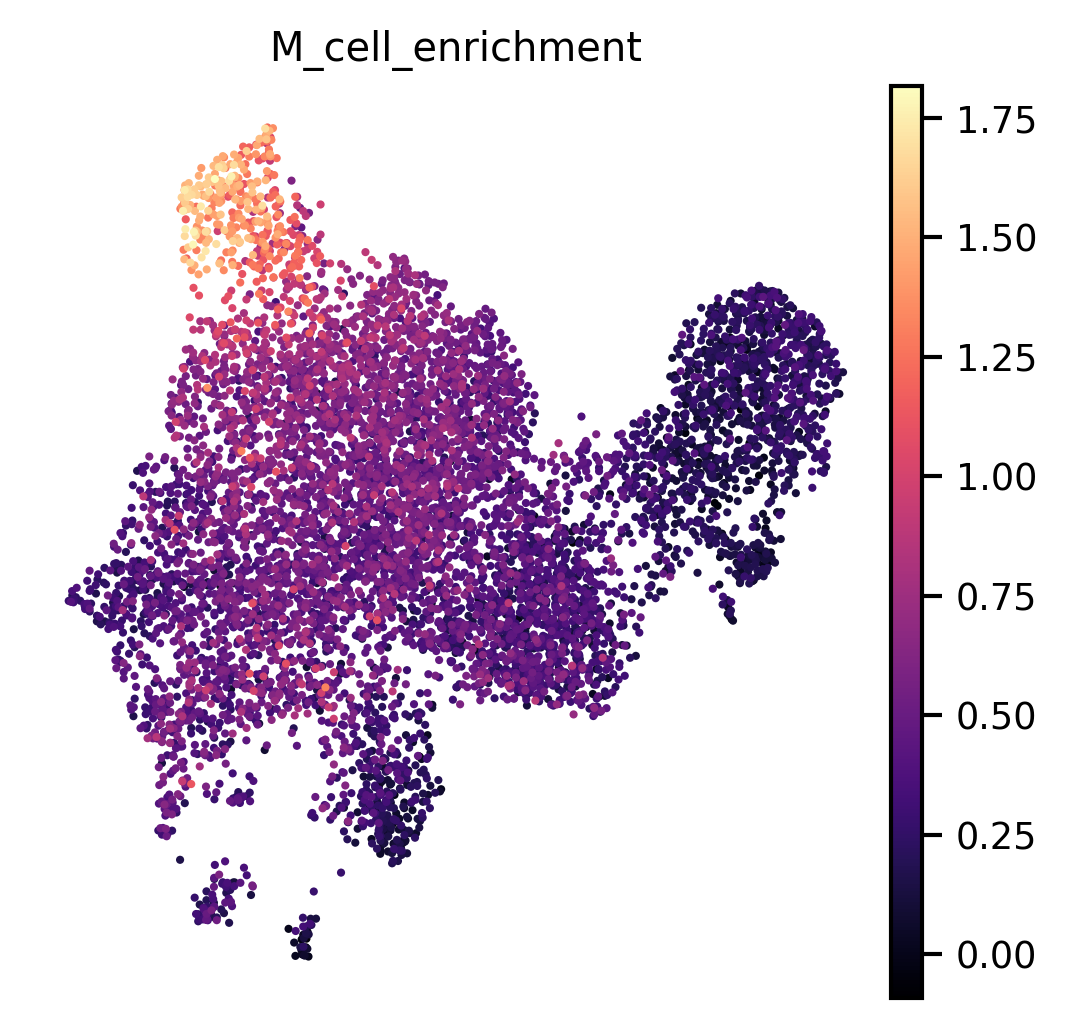

In [12]:
sc.pl.umap(
    adata,
    color="M_cell_enrichment",
    cmap="magma",
)

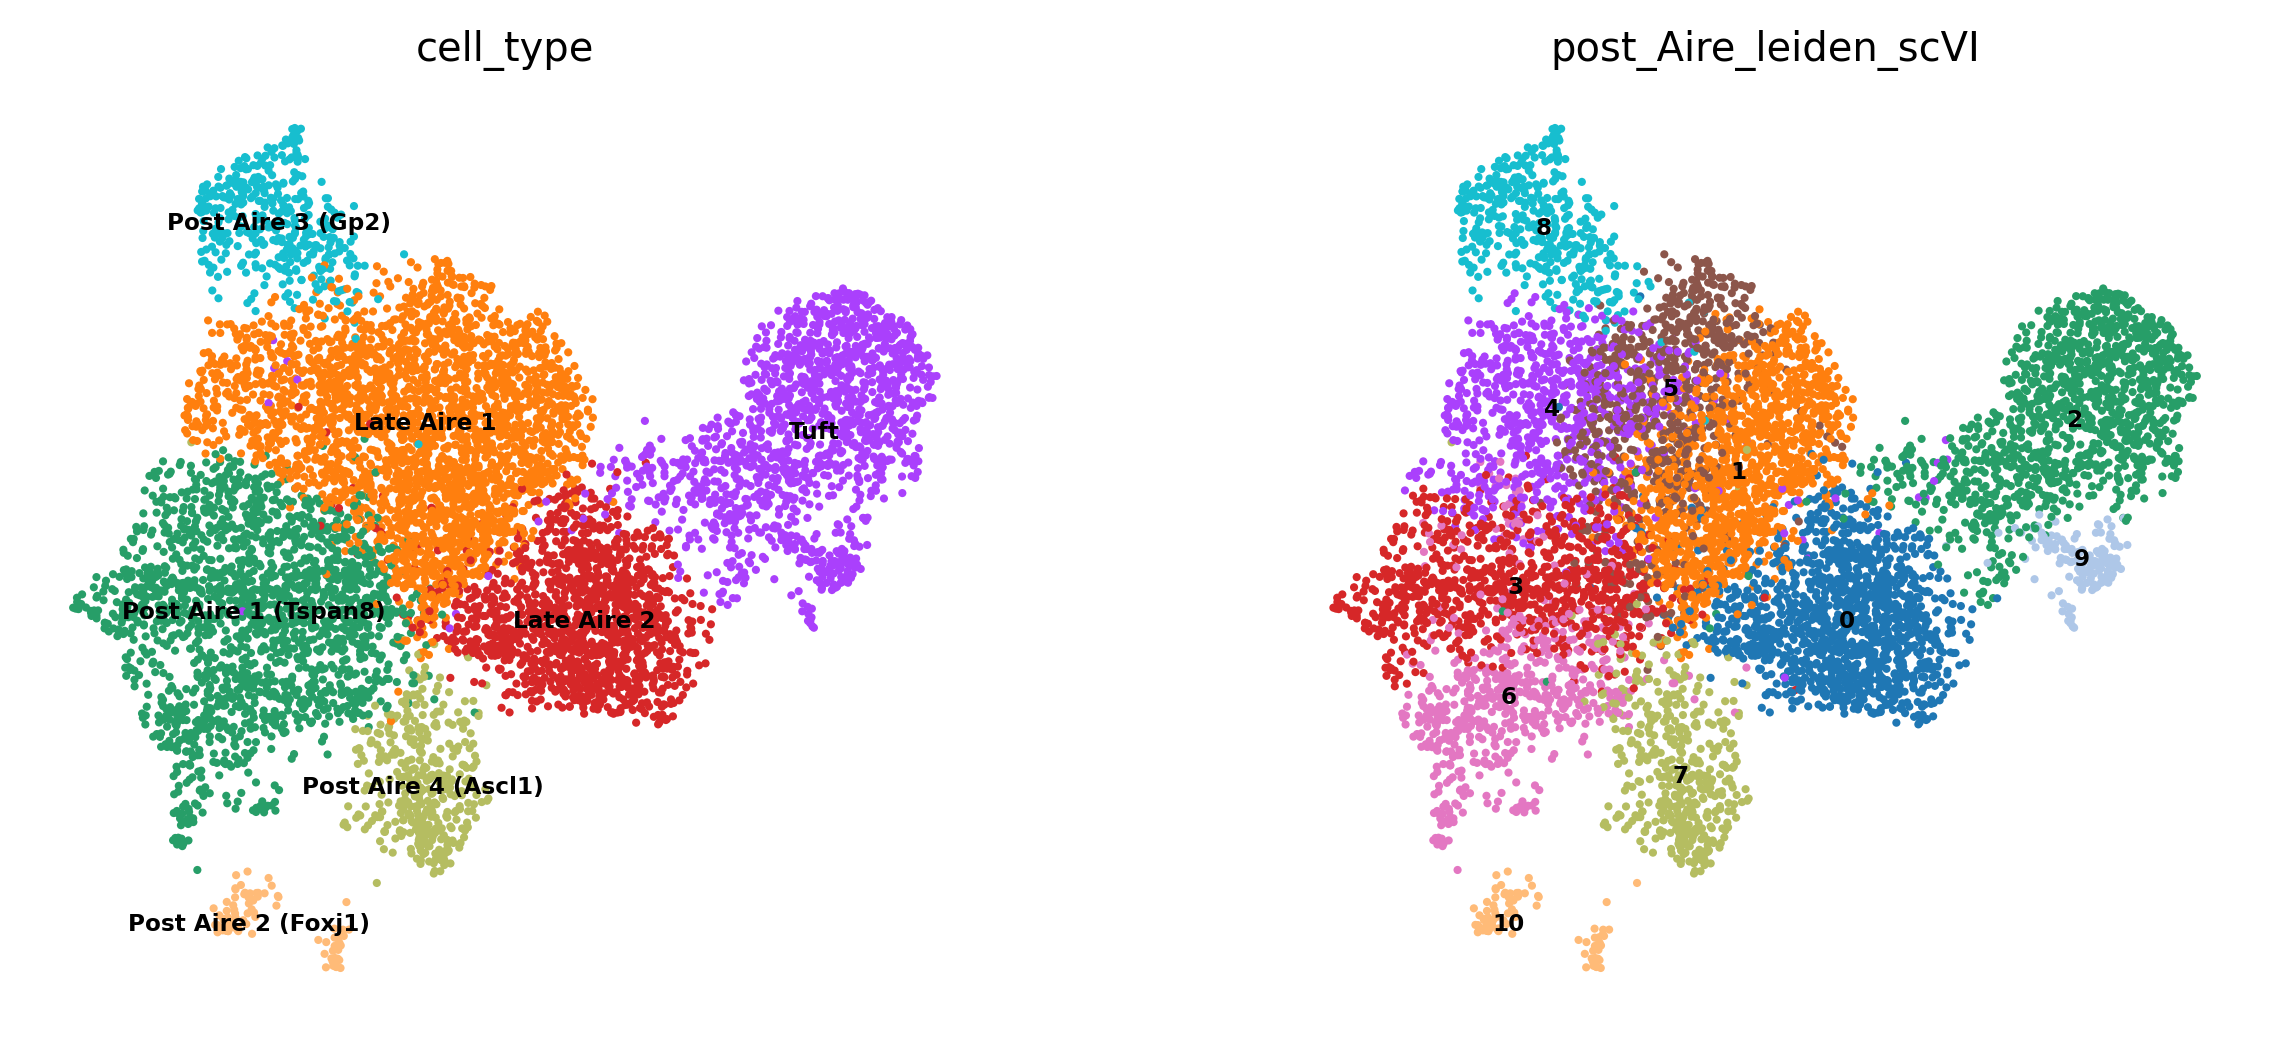

In [13]:
sc.pl.umap(
    adata,
    color=["cell_type", "post_Aire_leiden_scVI"],
    legend_loc="on data",
    legend_fontsize="xx-small",
)

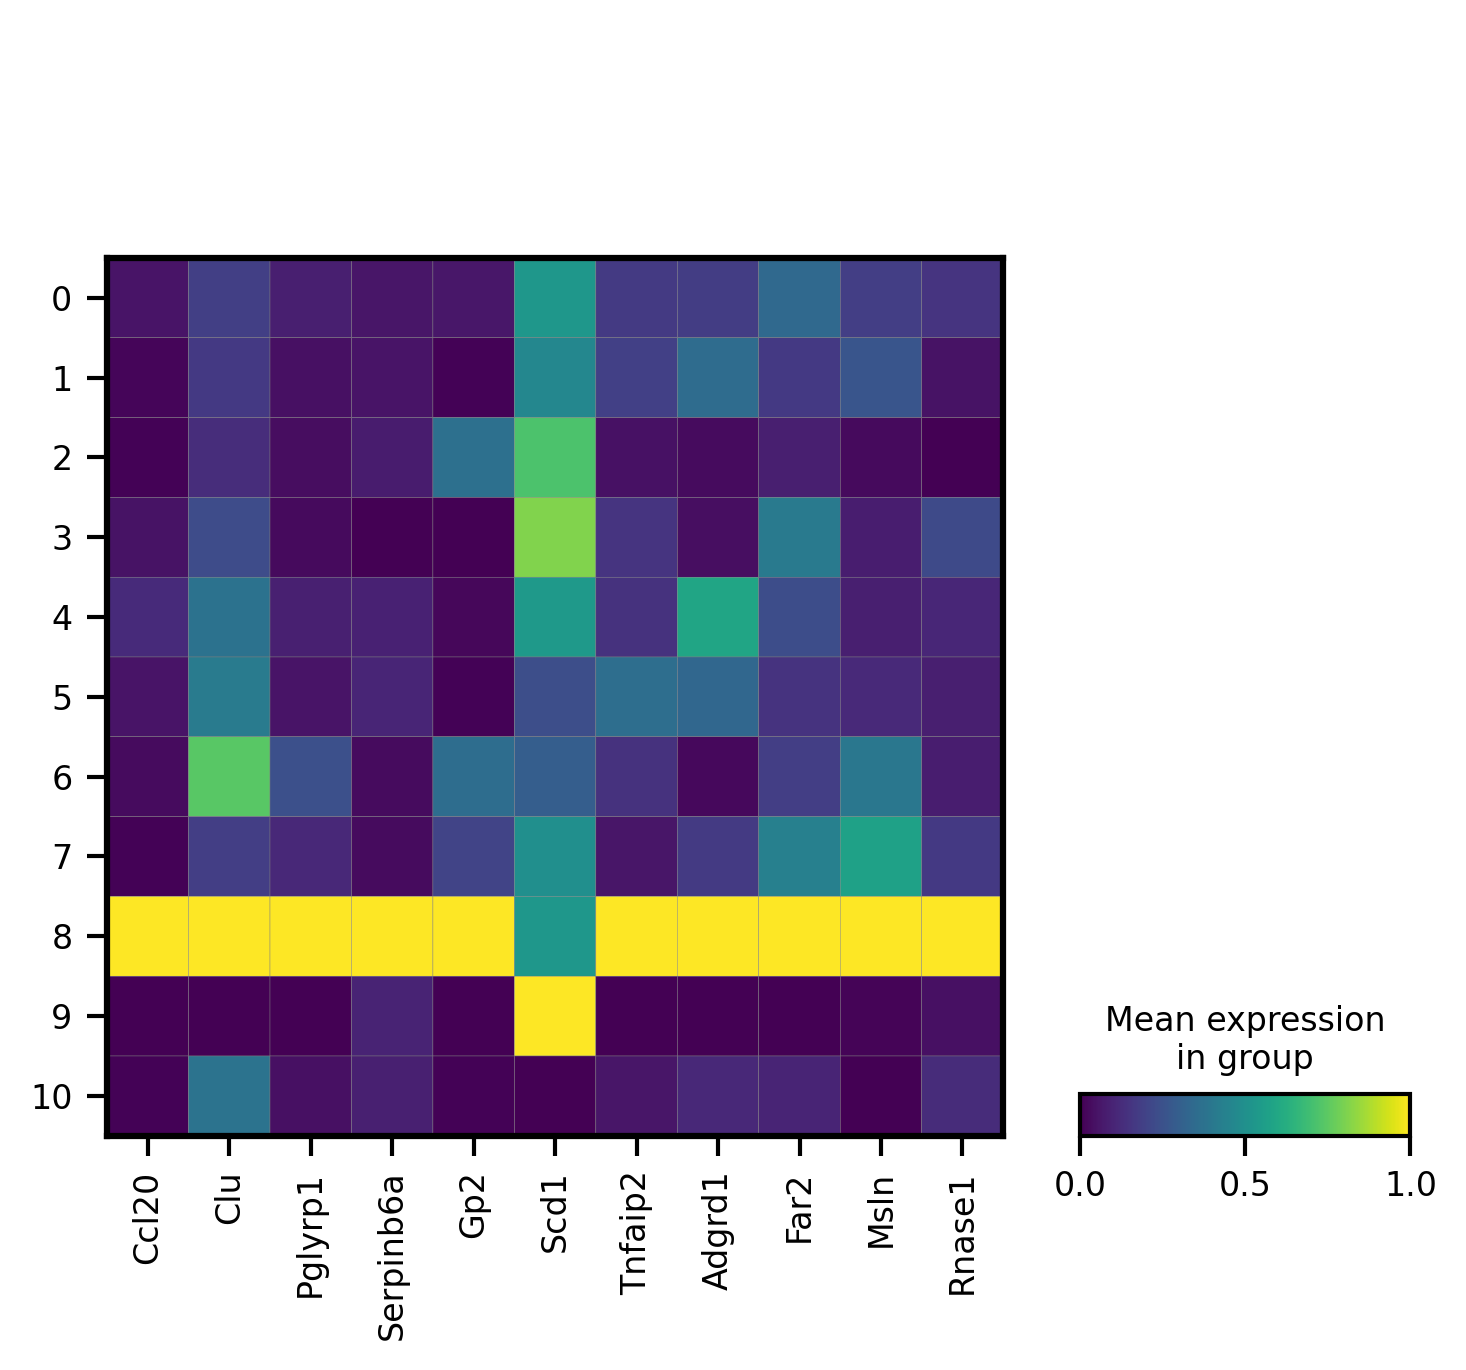

In [14]:
sc.pl.matrixplot(
    adata,
    var_names=[i for i in McellGenes if i in adata.var_names],
    groupby="post_Aire_leiden_scVI",
    standard_scale="var",
    use_raw=False,
    layer="scVI_normalized"
)

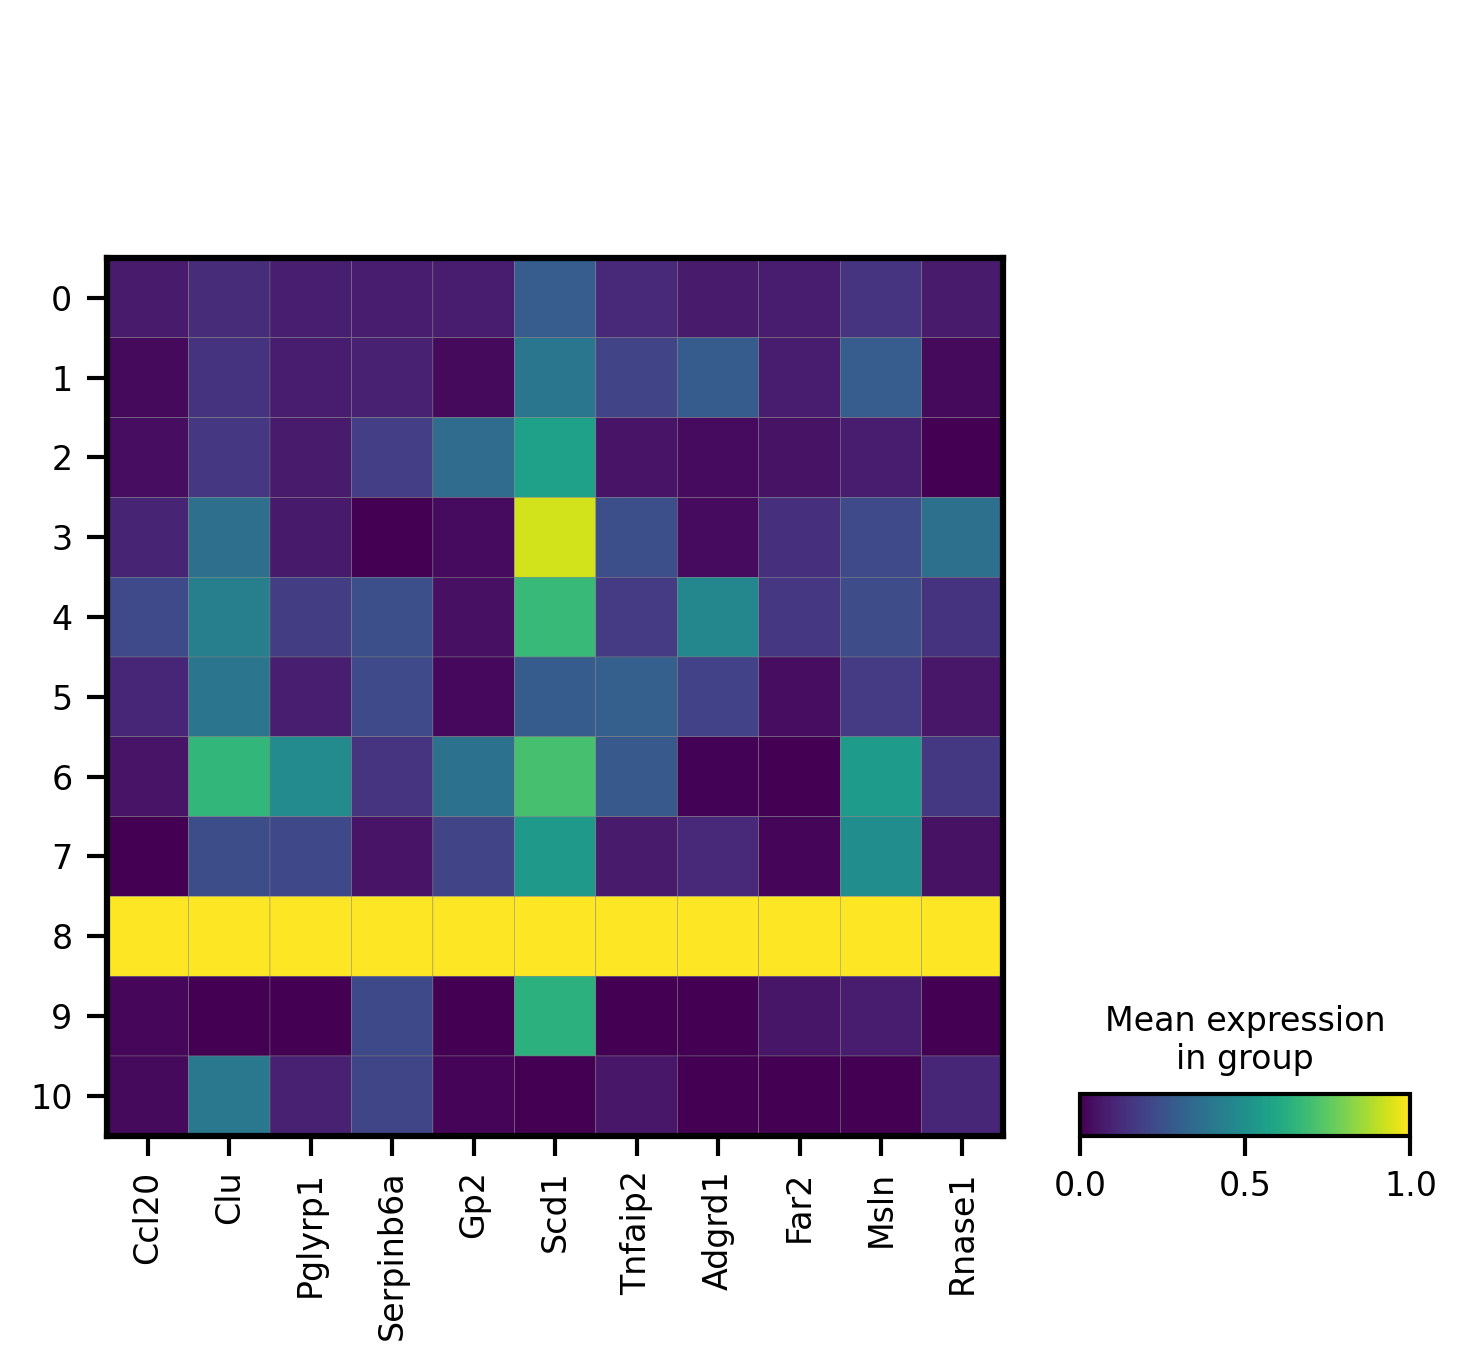

In [15]:
sc.pl.matrixplot(
    adata,
    var_names=[i for i in McellGenes if i in adata.var_names],
    groupby="post_Aire_leiden_scVI",
    standard_scale="var",
    use_raw=False,
)

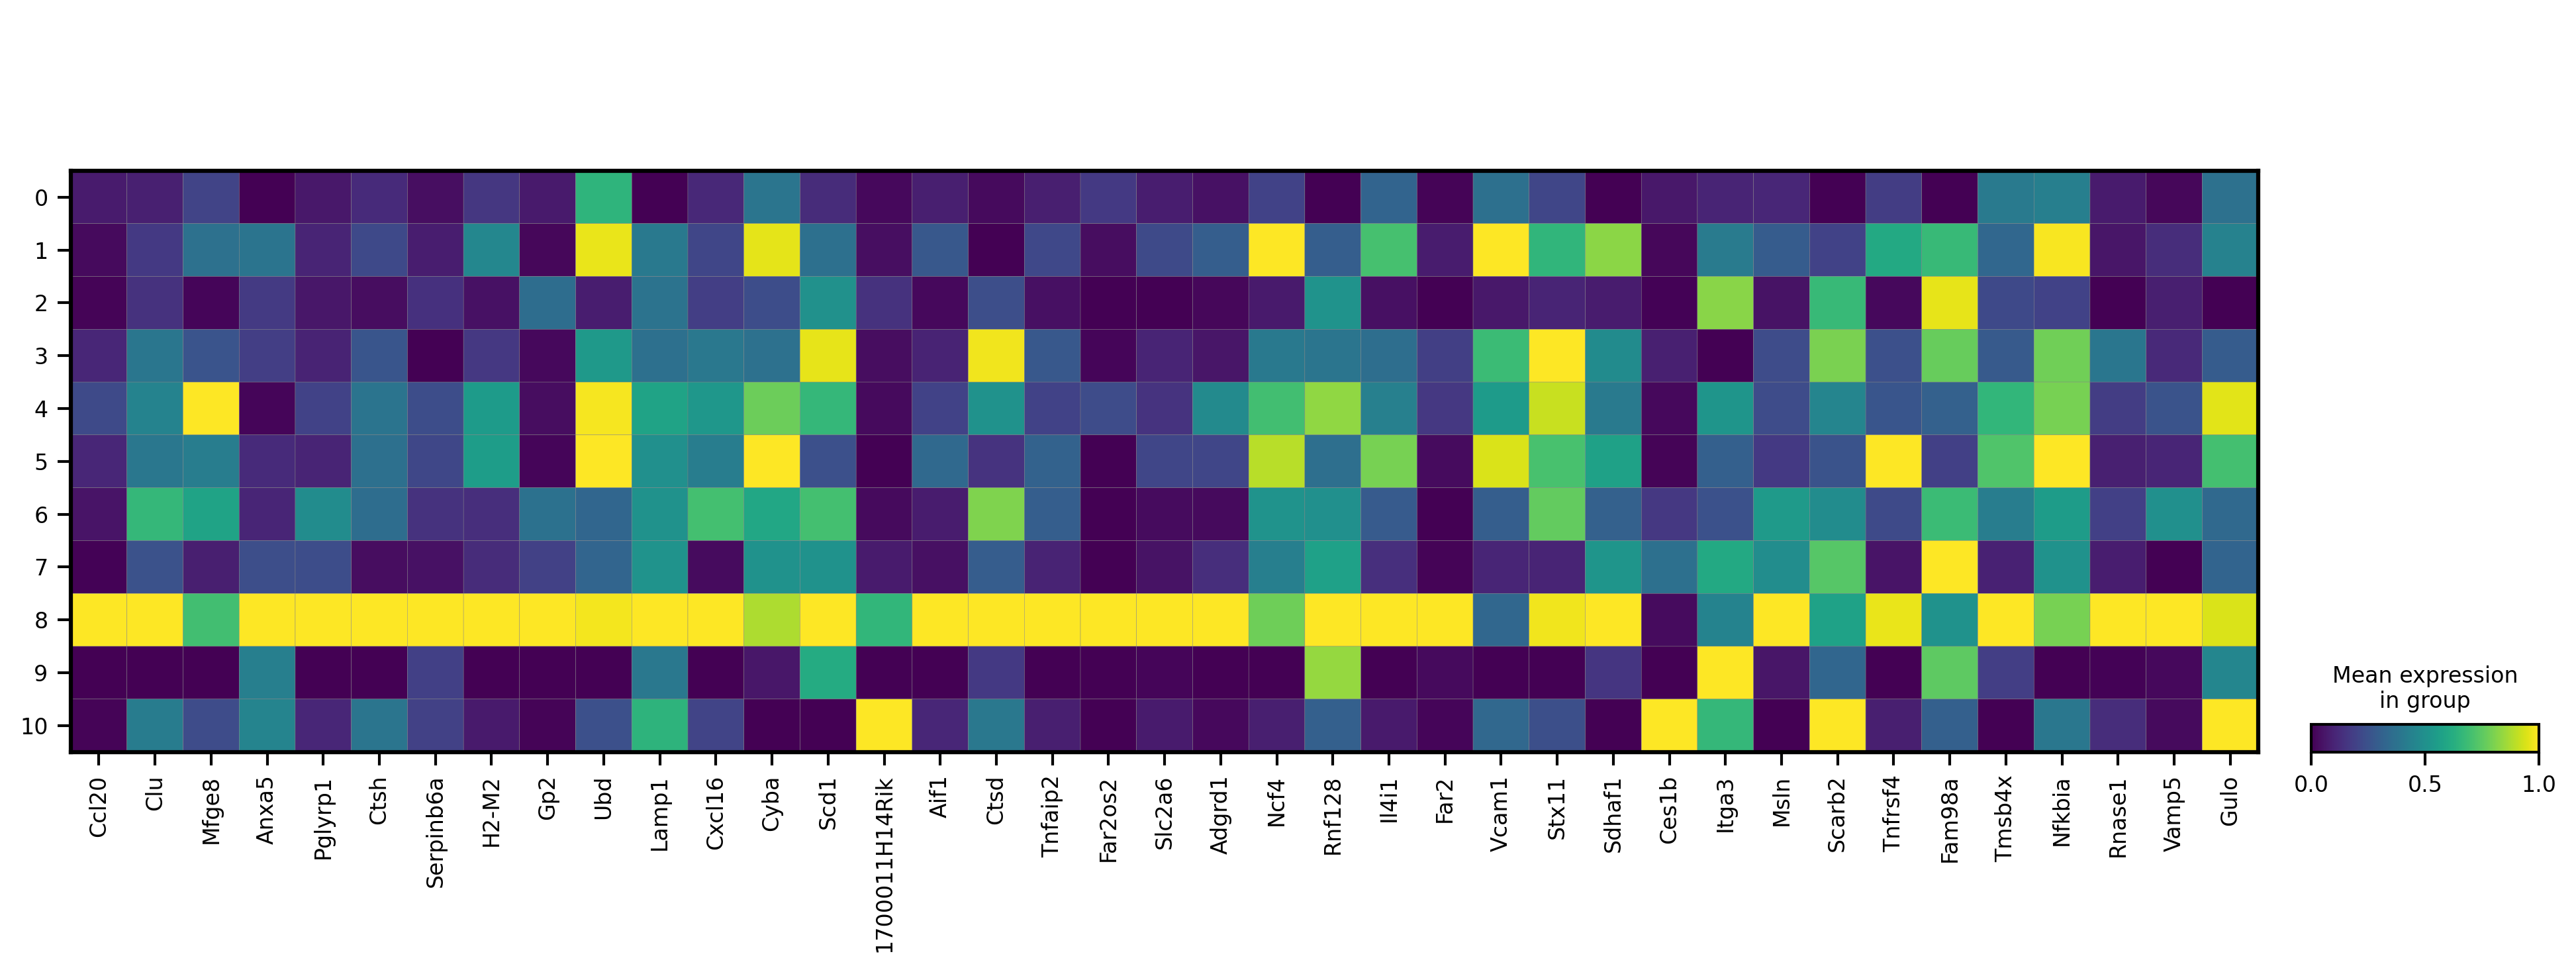

In [16]:
sc.pl.matrixplot(
    adata,
    var_names=[i for i in McellGenes if i in adata.raw.var_names],
    groupby="post_Aire_leiden_scVI",
    standard_scale="var",
)

## DE comparison

In [17]:
McellDE = pd.read_csv("/notebook/Joe/M-cells/analysis/DE_post_aire_cell_types/Post Aire 3 (Gp2)_marker_genes.csv", index_col=0)

In [18]:
McellDE["rank"] = [i for i in range(1,len(McellDE)+1)]
McellDE

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2,rank
Ccl9,0.9960,0.0040,5.517450,0.011211,0.000869,0.0,0.25,4.464964,4.351378,1.862799,...,0.640262,0.949468,0.150933,121.674706,6.472883,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,1
Serpinb6a,0.9944,0.0056,5.179371,0.046109,0.003562,0.0,0.25,3.780579,3.748191,1.546203,...,2.570528,0.976064,0.621190,574.403900,38.566116,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,2
Ccl6,0.9936,0.0064,5.045035,0.017652,0.000834,0.0,0.25,5.168795,5.142723,2.058777,...,0.418963,0.835106,0.076407,156.859950,3.767000,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,3
Ccl20,0.9926,0.0074,4.898846,0.041961,0.001854,0.0,0.25,5.334074,5.383661,2.168514,...,2.383490,0.946809,0.225728,577.174800,21.605404,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,4
Serpinb1a,0.9830,0.0170,4.057395,0.044636,0.008303,0.0,0.25,2.989548,2.760034,1.714259,...,8.286856,0.989362,0.637438,550.067200,93.737946,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samsn1,0.9276,0.0724,2.550394,0.002295,0.001119,0.0,0.25,1.186875,1.147007,2.461870,...,0.569631,0.502660,0.185444,18.760784,9.040359,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,80
Upp1,0.9274,0.0726,2.547420,0.001033,0.000508,0.0,0.25,1.725634,1.693590,2.032314,...,0.327920,0.385638,0.134282,9.026986,4.848212,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,81
Sprr1a,0.9260,0.0740,2.526809,0.002376,0.001480,0.0,0.25,1.438310,1.422170,1.804657,...,2.405509,0.542553,0.202498,26.220100,17.902860,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,82
Lgals4,0.9250,0.0750,2.512306,0.002217,0.001497,0.0,0.25,1.301158,1.258512,2.263960,...,1.650859,0.577128,0.212703,19.976559,12.826982,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,83


In [19]:
mCellGenesInData = [i for i in McellGenes if i in adata.var_names]

In [20]:
len(mCellGenesInData)

11

In [21]:
McellDE[McellDE.index.isin(mCellGenesInData)]

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2,rank
Serpinb6a,0.9944,0.0056,5.179371,0.046109,0.003562,0.0,0.25,3.780579,3.748191,1.546203,...,2.570528,0.976064,0.621190,574.403900,38.566116,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,2
Ccl20,0.9926,0.0074,4.898846,0.041961,0.001854,0.0,0.25,5.334074,5.383661,2.168514,...,2.383490,0.946809,0.225728,577.174800,21.605404,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,4
Tnfaip2,0.9778,0.0222,3.785212,0.012468,0.002105,0.0,0.25,2.810932,2.753811,1.565636,...,1.950297,0.912234,0.412381,186.176010,23.730799,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,12
Pglyrp1,0.9770,0.0230,3.748992,0.028455,0.002504,0.0,0.25,3.568583,3.679537,1.977726,...,3.426563,0.946809,0.452666,339.580570,29.245033,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,13
Rnase1,0.9736,0.0264,3.607636,0.006444,0.000888,0.0,0.25,2.935928,2.950331,1.841444,...,0.847596,0.603723,0.175910,76.089320,8.085554,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,15
Gp2,0.9714,0.0286,3.525331,0.016204,0.002288,0.0,0.25,3.787511,4.006668,2.497067,...,2.685759,0.675532,0.191352,192.963670,28.239930,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,20
Msln,0.9558,0.0442,3.073824,0.008072,0.001943,0.0,0.25,2.299189,2.356508,1.644007,...,1.625343,0.835106,0.353699,87.682014,17.954515,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,39
Clu,0.9514,0.0486,2.974311,0.027396,0.009545,0.0,0.25,1.738422,1.792633,1.057446,...,10.582705,0.968085,0.720156,329.805800,106.097400,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,42
Adgrd1,0.9488,0.0512,2.919458,0.004312,0.001092,0.0,0.25,2.170239,2.181172,2.760940,...,0.576613,0.598404,0.166779,34.719040,7.927331,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,46
Far2,0.9444,0.0556,2.832366,0.000411,0.000123,0.0,0.25,2.251769,2.225409,1.973195,...,0.056398,0.242021,0.023634,3.234871,0.476417,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,50


In [22]:
top30DE = McellDE.index[0:30]

In [23]:
top30DE

Index(['Ccl9', 'Serpinb6a', 'Ccl6', 'Ccl20', 'Serpinb1a', 'Fabp1',
       '1110046J04Rik', 'Umod', 'Abca13', 'Cr2', 'Gm37800', 'Tnfaip2',
       'Pglyrp1', 'Tnfrsf11b', 'Rnase1', 'Siglecf', 'Gucy1b2', 'Clca4b',
       'Krt20', 'Gp2', 'Dmbt1', 'Wfdc17', 'Clca4a', 'Hamp', 'Ccr5',
       '1700016F12Rik', 'Prg2', 'Mmp7', 'Fabp2', 'Sox8'],
      dtype='object')

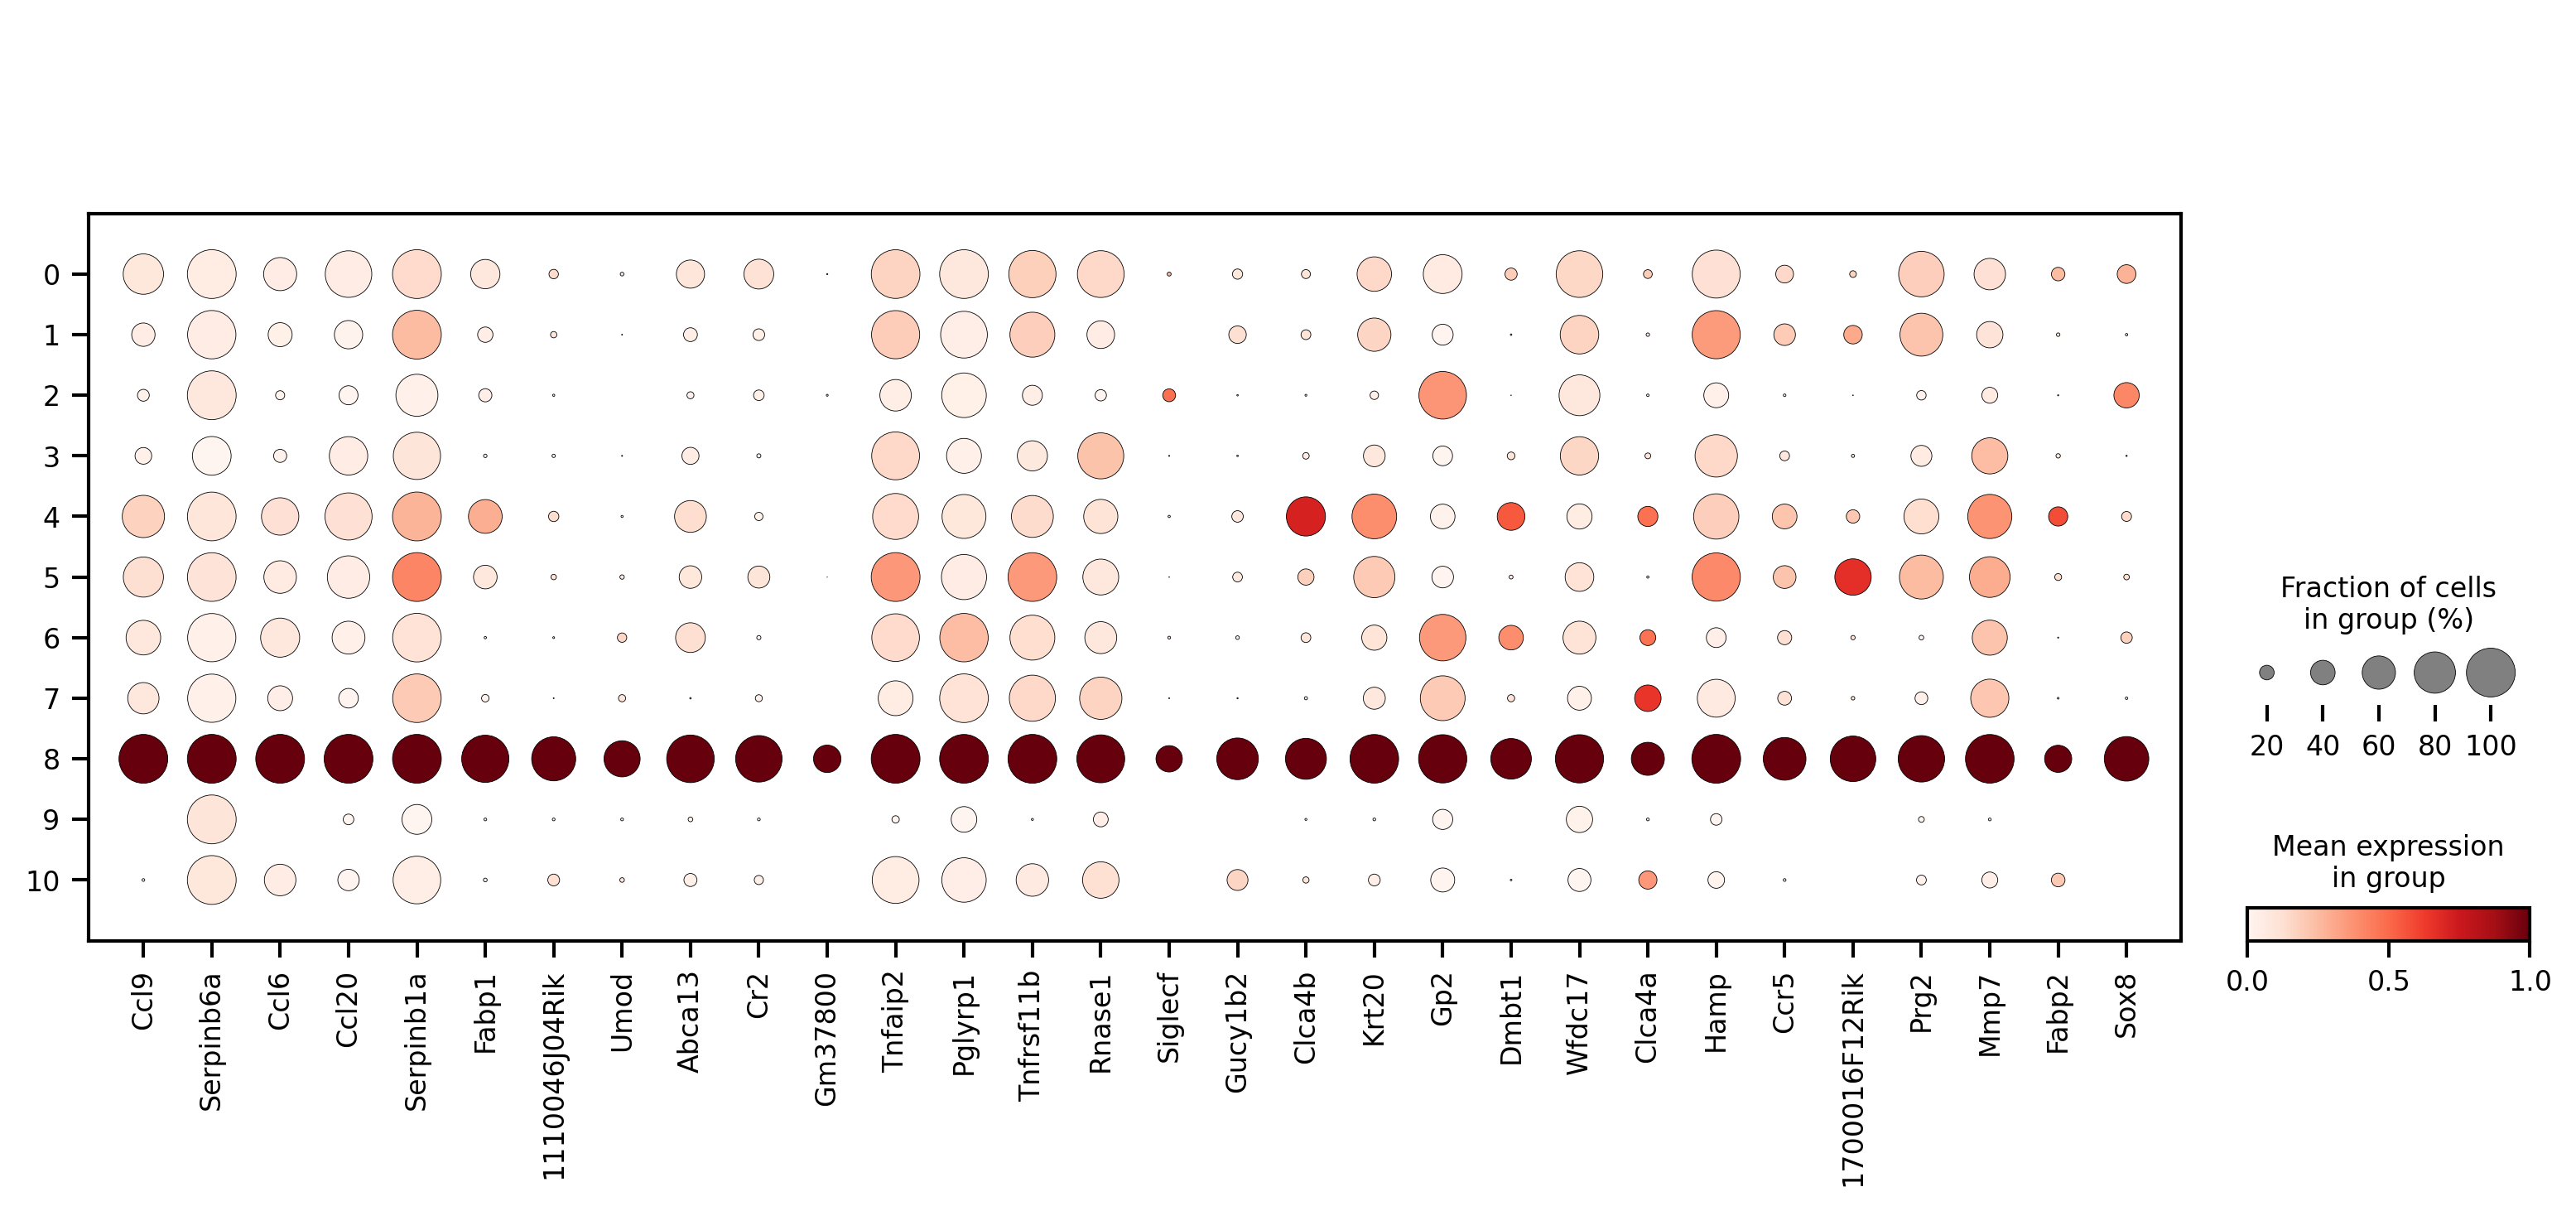

In [24]:
sc.pl.dotplot(
    adata,
    var_names=top30DE,
    groupby="post_Aire_leiden_scVI",
    standard_scale="var",
    use_raw=False,
    layer="scVI_normalized",
    expression_cutoff=5,
)